In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
plt.rcParams["text.usetex"] = True

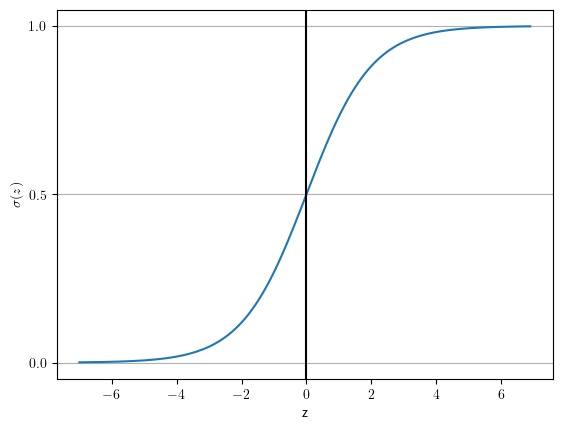

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color="k")
plt.xlabel("z")
plt.ylabel("$\\sigma (z)$")

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.show()

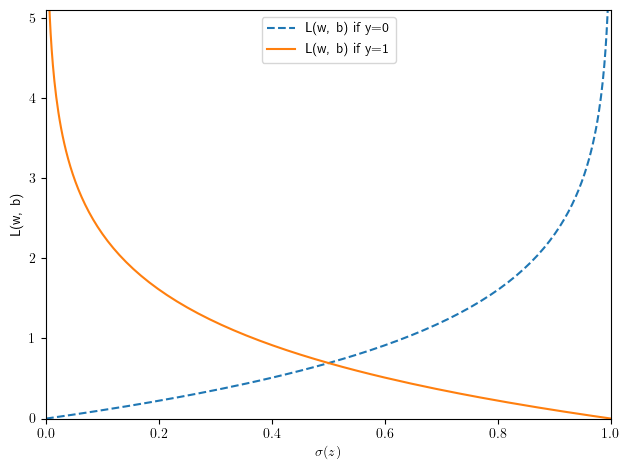

In [4]:
def loss_1(z):
    return -np.log(sigmoid(z))


def loss_0(z):
    return -np.log(1 - sigmoid(z))


z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
c0 = [loss_0(x) for x in z]

plt.plot(sigma_z, c0, label="L(w, b) if y=0", linestyle="--")
plt.plot(sigma_z, c1, label="L(w, b) if y=1", linestyle="-")

plt.ylim(0.0, 5.1)
plt.xlim(0.0, 1.0)

plt.xlabel("$\\sigma (z)$")
plt.ylabel("L(w, b)")
plt.legend(loc="upper center")
plt.tight_layout()
plt.show()

In [5]:
plt.rcParams["text.usetex"] = False

In [6]:
class LogisticRegressionGD:
    def __init__(self, eta, n_iter, random_state):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size=X.shape[1])
        self.b_ = np.float64(0.0)

        self.losses_ = []

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output

            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()

            loss = (
                -y.dot(np.log(output)) - (1.0 - y).dot(np.log(1.0 - output))
            ) / X.shape[0]

            self.losses_.append(loss)

        return self

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [7]:
data, target = load_iris(return_X_y=True)
X = data[:100, [2, 3]]
y = target[:100]

scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

X_train_std, X_test_std, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
)

In [8]:
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)

lrgd.fit(X_train_std, y_train)


In [9]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")

    cmap = ListedColormap(colors[: len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[cl],
            marker=markers[cl],
            label=f"Class {cl}",
            edgecolor="black",
        )

    if test_idx:
        X_test, _ = X[test_idx, :], y[test_idx]

        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c="none",
            edgecolor="black",
            alpha=1.0,
            linewidth=1,
            marker="o",
            s=100,
            label="Test set",
        )


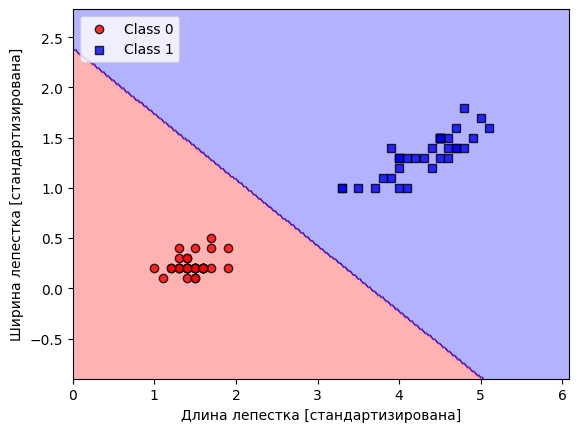

In [10]:
plot_decision_regions(X_train_std, y_train, classifier=lrgd)
plt.xlabel("Длина лепестка [стандартизирована]")
plt.ylabel("Ширина лепестка [стандартизирована]")
plt.legend(loc="upper left")
# plt.tight_layout()
plt.show()

In [11]:
accuracy_score(y_test, lrgd.predict(X_test_std))

1.0

Using sklearn optimised model


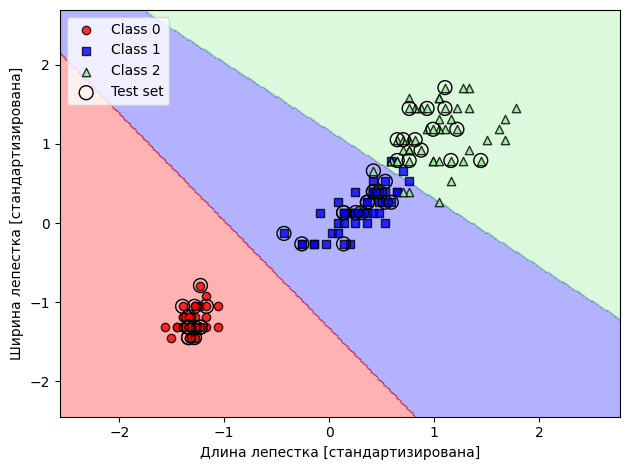

In [12]:
lr = LogisticRegression(
    C=1.0,
    solver="lbfgs",
)

iris = load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

scaler = StandardScaler().fit(X)

X_std = scaler.transform(X)

X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_std,
    y,
    stratify=y,
    test_size=0.3,
    random_state=1,
)

lr.fit(X_train_std, y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


plot_decision_regions(X_combined_std, y_combined, lr, test_idx=range(105, 150))
plt.xlabel("Длина лепестка [стандартизирована]")
plt.ylabel("Ширина лепестка [стандартизирована]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [13]:
lr.predict_proba(X_test_std[:3, :])

array([[4.63356254e-05, 5.88866096e-02, 9.41067055e-01],
       [9.10168774e-01, 8.98092573e-02, 2.19691614e-05],
       [9.50608652e-01, 4.93854435e-02, 5.90468810e-06]])

In [14]:
np.argmax(lr.predict_proba(X_test_std[:3, :]), axis=1)

array([2, 0, 0])

In [15]:
# .predict want 2d-array
# .reshape(1, -1) change 1d-array to 2d-array
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])